<a href="https://colab.research.google.com/github/All4Nothing/pytorch-DL-project/blob/main/Ch03_Deep_CNN_Architecture(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. 심층 CNN 아키텍처

## 왜 CNN이 막강한가?

CNN은 이미지 분류, 객체 탐지, 객체 분할, 동영상 처리, 자연어 처리, 음성 인식 등 까다로운 문제를 푸는데 가장 강력한 머신러닝 모델 중 하나다.
- **가중치 공유** : CNN은 가중치를 공유함으로써 매개변수를 효율적으로 활용한다. 즉 동일한 가중치 또는 매개변수로 다양한 특징을 추출한다. 특징은 모델이 매개변수를 사용해 생성하는 입력 데이터의 고수준 표현이다.
- **자동 특징 추출** : 특징 추출 단계를 여럿 둠으로써 CNN은 데이터셋에서 자동으로 특징 표현을 학습할 수 있다.  
- **계층적 학습** : 여러 계층으로 구성된 CNN 구조 덕분에 CNN은 저수준부터 고수준까지의 특징을 학습할 수 있다.
- 동영상 처리 작업처럼, 데이터에서 **공간적·시간적** 상관관계를 탐색할 수 있다.  


이러한 기존의 본질적은 특징 외에 CNN은 다음 영역에서 개선을 이룬 덕분에 수년에 걸쳐 발전했다.  
- **경사 손실 문제(Vanishing Gradient Problem)**를 극복하기 위해 ReLU 같은 더 나은 **활성화 함수**와 **손실 함수**를 사용한다.
  - 경사 손실 문제 : 신경망에서 역전파는 미분의 연쇄 법칙을 기반으로 작동한다. 연쇄 법칙에 따르면 입력 계층 매개변수에 대한 손실 함수의 경사는 각 계층의 경사의 곱으로 나타낼 수 있다. 이 경사가 모두 1보다 작고, 게다가 0을 향하는 경향이 있는 경우 이 경사의 곱은 사라질 정도로 작은 값이 된다. 경사 소실 문제는 네트워크 매개변수의 값을 변경(update)할 수 없게 만들어 최적화 프로세스에 심각한 문제를 일으키고 학습을 저해한다.
- **매개변수 최적화** : 단순환 **확률적 경사 하강법** 대신 **적응형 모멘트 추정(Adam, Adaptive Momentum)** 기법에 기반한 옵티마이저 등을 사용한다.  
- 정규화(Regularization)** : L2 정규화 외에 드롭아웃과 배치 정규화를 적용한다.  
  - L2 정규화 : L2 Norm(Euclidean Distance)를 전체적으로 가중치를 작게함. * L1 Norm : (Manhattan Distance)  

그렇지만 수년에 걸친 CNN 발전의 가장 중요한 견인 역할을 한 것은 다양한 **아키텍처 혁신**에 있다.  
- **공간 탐색 기반 CNN** : **공간 탐색**은 입력 데이터에서 다양한 수준의 시각적 특징을 탐색하기 위해 다양한 커널 크기를 사용하는 것을 기본 아이디어로 삼는다.
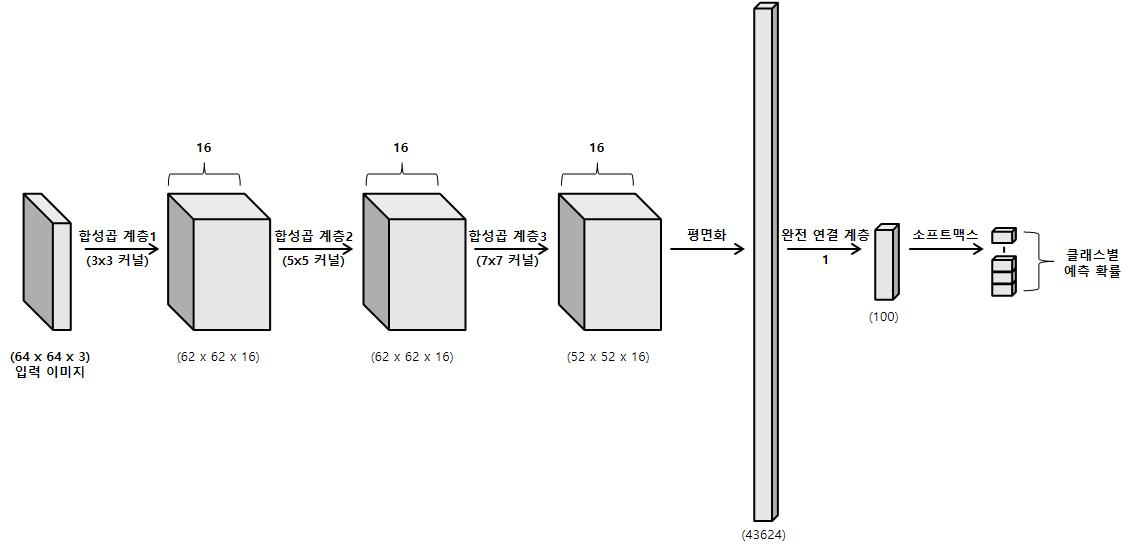

- **깊이 기반 CNN** : 여기서 **깊이**란 신경망 깊이, 즉 계층 수를 말한다. 따라서 여기는 고도로 복합적인 시각 특징을 추출하기 위해 여러 개의 합성곱 계층을 두어 CNN 모델을 생성한다.  
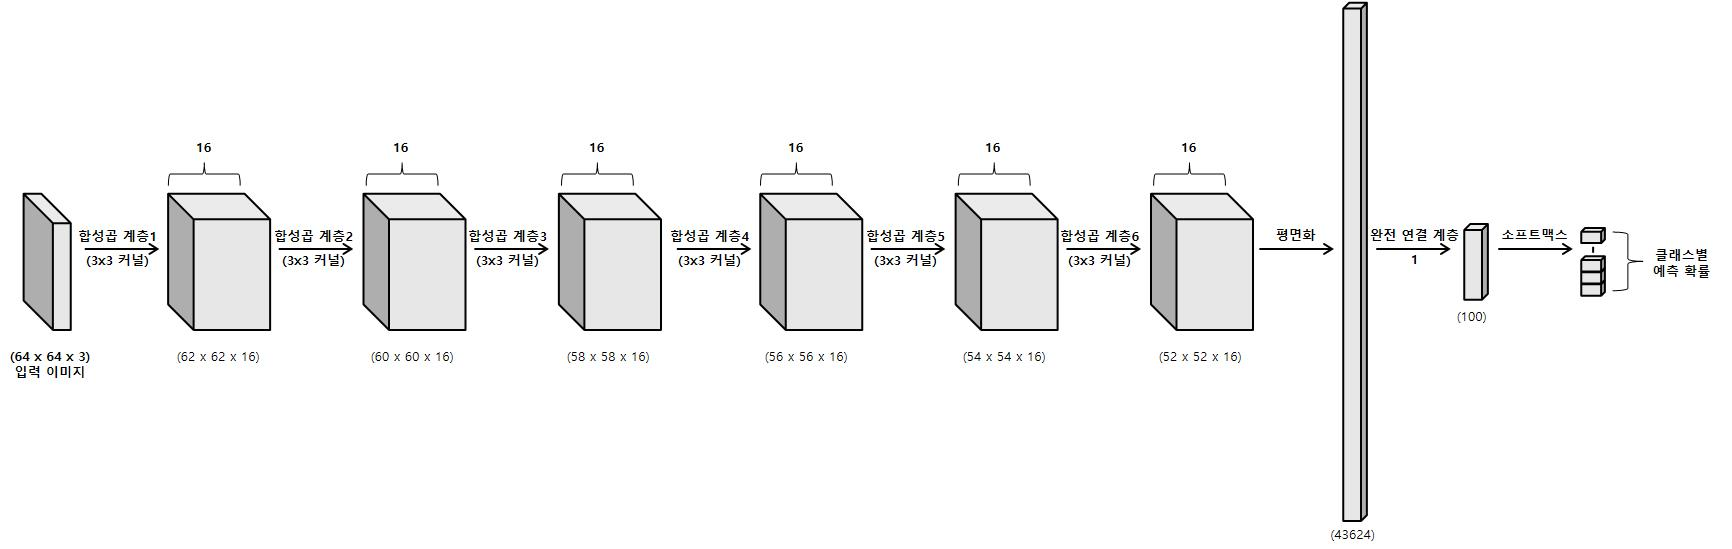

- **너비 기반 CNN** : 너비는 데이터에서 채널이나 특징 맵 개수, 또는 데이터로부터 추출된 특징 개수를 말한다. 따라서 너비 기반 CNN은 다음 그림에 나온 것처럼 입력 계층에서 출력 계층으로 이동할 때 특징 맵 개수를 늘린다.  
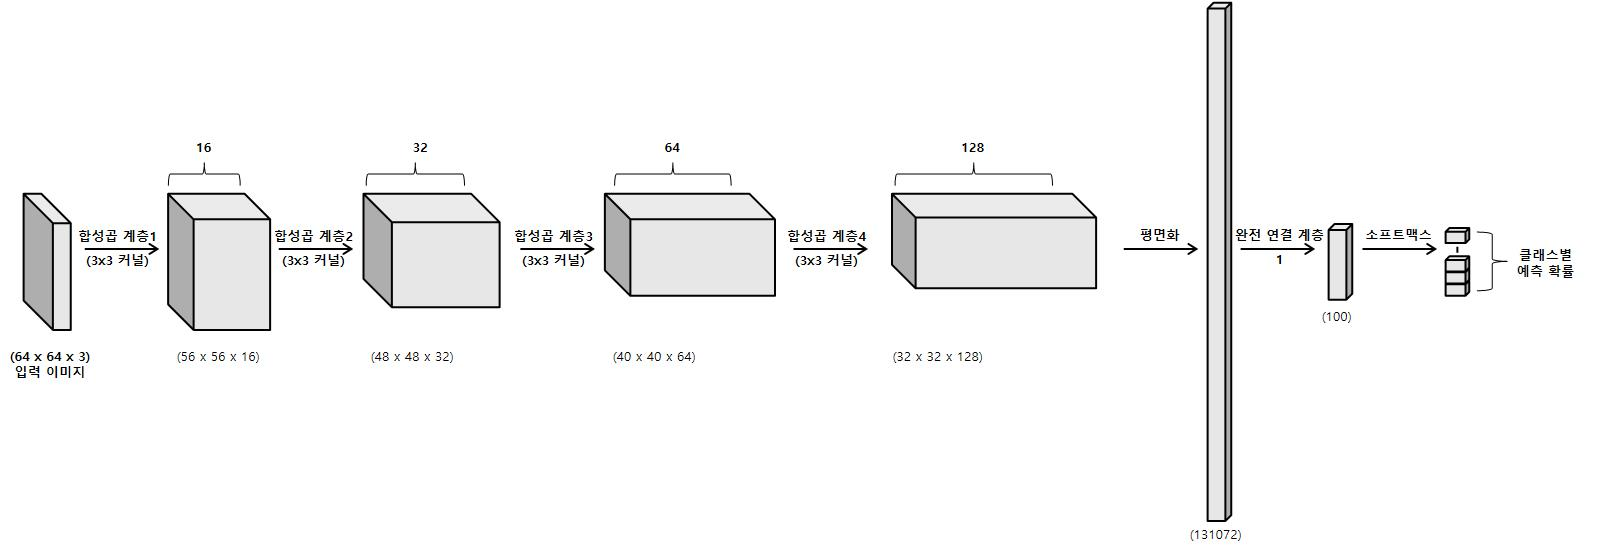

- **다중 경로 기반 CNN** : 지금까지 앞선 세 가지 유형의 아키텍처는 계층 간 단조롭게 연결돼 있다. 즉, 연이은 계층 사이에 직접 연결만 존재한다. **다중 경로 기반 CNN**은 연이어 있지 않은 계층 간 숏컷 연결(shortcut connections) 또는 스킵 연결(skip connections) 등의 방식을 채택한다. 다중 경로 아키텍처의 핵심 장점은 스킵 연결 덕분에 여러 계층에 정보가 더 잘 흐르게 된다는 것이다. 이는 또한 너무 많은 손실 없이 경사가 입력 계층으로 다시 흐르도록 한다.
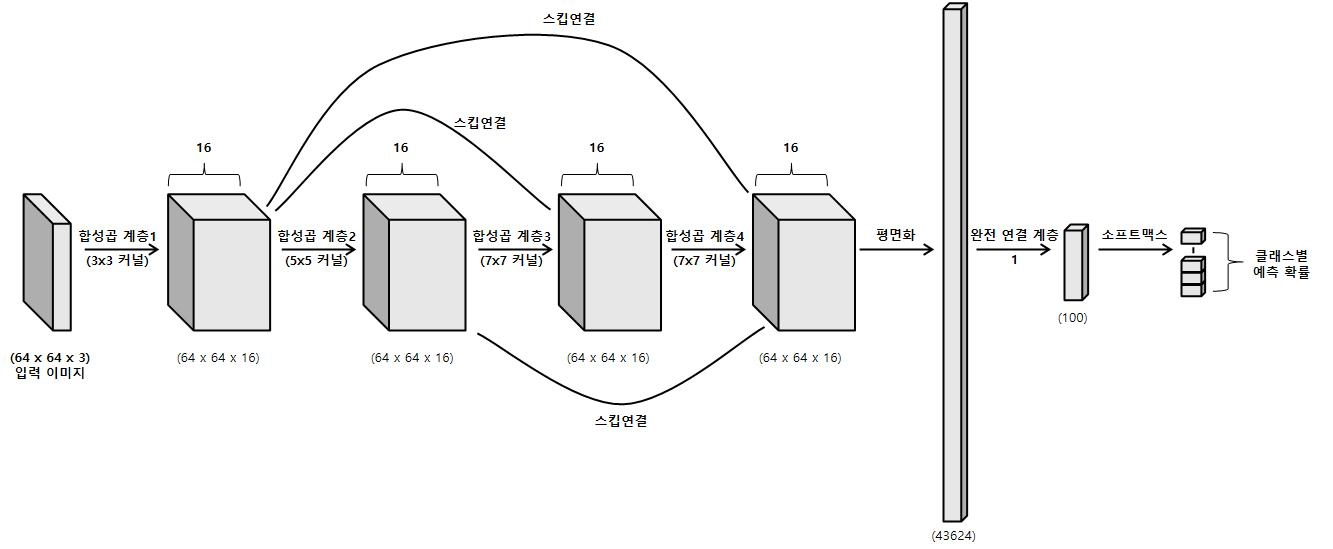


## LeNet(1998)  
LeNet-5로 알려진 LeNet은 1998년에 개발된 초기 CNN 모델 중 하나다. 숫자 5는 이 모델의 전체 계층 수, 즉 2개의 합성곱 계층과 3개의 완전 연결 계층을 나타낸다.  
CNN 모델에서 예상할 수 있는 것과 같이, LeNet은 회전, 위치, 크기에 대한 불변성(invariance)과 함께 이미지 왜곡에 대해서도 견고한 성능을 보였다.  
이미지의 각 픽셀을 별도로 다루는 SVM 같은 전통적인 머신러닝 모델과 달리, LeNet은 인접한 픽셀 간의 상관관계를 이용한다.

### 파이토치로 LeNet 구성하기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

torch.manual_seed(55)

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__() ## super().__init__()과 동일, 단 super(class, self).__init__은 python2에서도 작동
    # 3 input image channel, 6 output feature maps and 5x5 conv kernel
    self.cn1 = nn.Conv2d(3, 6, 5)
    # 6 input image channel, 16 output feature maps and 5x5 conv kernel
    self.cn2 = nn.Conv2d(6, 16, 5)
    # fully connected layers of size 120, 84 and 10
    self.fc1 = nn.Linear(16 * 5 * 5, 120) # # 5*5 is the spatial dimension at this layer
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
      # Convolution with 5x5 kernel
      x = F.relu(self.cn1(x))
      # Max pooling over a (2, 2) window
      x = F.max_pool2d(x, (2, 2))
      # Convolution with 5x5 kernel
      x = F.relu(self.cn2(x))
      # Max pooling over a (2, 2) window
      x = F.max_pool2d(x, (2, 2))
      # Flatten spatial and depth dimensions into a single vector
      x = x.view(-1, self.flattened_features(x))
      # Fully connected operations
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return x

# flattened_features 메서드는 이미지 표현 계층에서 특징(일반적으로 합성곱 계층이나 풀링 계층의 출력)의 전체 개수를 계산하는데 쓰인다.
# 이 메서드는 특징의 공간적 표현을 단일 숫자 벡터로 평면화하여 완전 연결 계층의 입력으로 사용될 수 있도록 해준다.
  def flattened_features(self, x):
    # all except the first (batch) dimension 첫 번째 (배치) 차원 제외
    size = x.size()[1:]
    num_feats = 1
    for s in size:
        num_feats *= s
    return num_feats

lenet = LeNet()
print(lenet)

LeNet(
  (cn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (cn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
def train(net, trainloader, optim, epoch):
  # initalize loss
  loss_total = 0.0

  for i, data in enumerate(trainloader, 0): # 두 번째 파라미터 = start, index counting 시작 숫자를 지정할 수 있다.
    # input을 가져옴, data는 [input, labels]의 list
    # ip는 input image, ground_truth는 ip가 속한 image의 출력 class를 말함
    ip, ground_truth = data # ip : input
    # 매개변수인 경사를 0으로 설정
    optim.zero_grad()
    # forward pass + backward pass + optimization step
    op = net(ip) # op : output
    loss = nn.CrossEntropyLoss()(op, ground_truth)
    loss.backward()
    optim.step()
    # update loss 손실 업데이트
    loss_total += loss.item()
    # 손실 통계 출력
    if (i + 1) % 1000 == 0: # 1000 미니 배치 간격으로 출력
      print(
          '[Epoch number : %d, Mini-batches: %5d] loss" %.3f'
          % (epoch + 1, i + 1, loss_total / 1000)
      )
      loss_total = 0.0

In [ ]:
def test(net, testloader):
  success = 0
  counter = 0
  with torch.no_grad(): # torch.no_grad() 함수는 autograd engine(gradient를 계산해주는 context)을 비활성화 시켜 더 이상 gradient를 트래킹하지 않게 된다. 따라서, 필요한 메모리를 줄여주고 연산속도를 증가시키는 역할을 한다.
    for data in testloader:
      im, ground_truth = data
      op = net(im)
      _, pred = torch.max(op.data, 1) # 인덱스와 최댓값 동시에 return. dim = 1 : 행을 기준
      counter += ground_truth.size(0) # size(0) : size 값만 return
      success += (pred == ground_truth).sum().item()
  print(
      'LeNet accuracy on 10000 images from test dataset: %d %%'
      % (100 * success / counter)
  )

In [ ]:
# 픽셀 값은 원래 0~1 사이이므로 픽셀 값을 정규화하기 위해 평균과 표준편차를 0.5로 유지
train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, 4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=train_transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=8, shuffle=True, num_workers=1
)
# batch_size : 몇개의 batch로 나눌 것인가
# num_workes : 데이터 로딩에 사용하는 subprocess(멀티 프로세싱) 개수

test_transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False, num_workers=2)

# ordering is important
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:16<00:00, 10346251.72it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


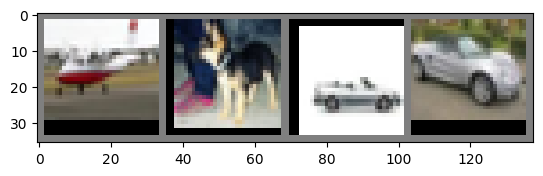

    plane  ||  dog  ||  car  ||  car


In [ ]:
# define a function that displays an image
def imageshow(image):
    # un-normalize the image
    image = image/2 + 0.5
    npimage = image.numpy()
    plt.imshow(np.transpose(npimage, (1, 2, 0)))
    plt.show()


# sample images from training set
images, labels = next(iter(trainloader)) # Error 발생하여 수정함

# display images in a grid
num_images = 4
imageshow(torchvision.utils.make_grid(images[:num_images]))
# print labels
print('    '+'  ||  '.join(classes[labels[j]] for j in range(num_images)))

### LeNet 훈련하기

In [ ]:
# define optimizer
optim = torch.optim.Adam(lenet.parameters(), lr=0.001)

# training loop over the dataset multiple times
for epoch in range(50):
    train(lenet, trainloader, optim, epoch)
    print()
    test(lenet, testloader)
    print()

print('Finished Training')

[Epoch number : 1, Mini-batches:  1000] loss" 1.955
[Epoch number : 1, Mini-batches:  2000] loss" 1.746
[Epoch number : 1, Mini-batches:  3000] loss" 1.665
[Epoch number : 1, Mini-batches:  4000] loss" 1.606
[Epoch number : 1, Mini-batches:  5000] loss" 1.554
[Epoch number : 1, Mini-batches:  6000] loss" 1.523

LeNet accuracy on 10000 images from test dataset: 45 %

[Epoch number : 2, Mini-batches:  1000] loss" 1.461
[Epoch number : 2, Mini-batches:  2000] loss" 1.468
[Epoch number : 2, Mini-batches:  3000] loss" 1.427
[Epoch number : 2, Mini-batches:  4000] loss" 1.432
[Epoch number : 2, Mini-batches:  5000] loss" 1.422
[Epoch number : 2, Mini-batches:  6000] loss" 1.400

LeNet accuracy on 10000 images from test dataset: 54 %

[Epoch number : 3, Mini-batches:  1000] loss" 1.373
[Epoch number : 3, Mini-batches:  2000] loss" 1.362
[Epoch number : 3, Mini-batches:  3000] loss" 1.337
[Epoch number : 3, Mini-batches:  4000] loss" 1.313
[Epoch number : 3, Mini-batches:  5000] loss" 1.334
[E

In [ ]:
# 모델 파일을 로컬 PC에 저장
model_path = './cifar_model.pth'
torch.save(lenet.state_dict(), model_path)

### LeNet 테스트하기

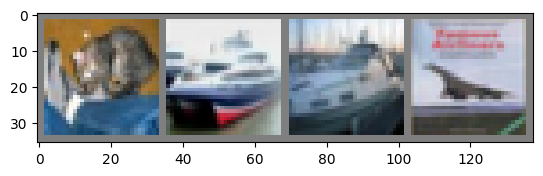

Label:         cat  ship  ship plane
Prediction:    cat  ship  ship plane


In [ ]:
# load test dataset images
im, ground_truth = next(iter(testloader))

# print images and ground truth
imageshow(torchvision.utils.make_grid(im[:4]))
print('Label:      ', ' '.join('%5s' % classes[ground_truth[j]] for j in range(4)))

# load model
lenet_cached = LeNet()
lenet_cached.load_state_dict(torch.load(model_path))

# model inference
op = lenet_cached(im)

# print predictions
_, pred = torch.max(op, 1)

print('Prediction: ', ' '.join('%5s' % classes[pred[j]] for j in range(4)))

In [ ]:
# 테스트 데이터셋에서 이 모델의 전반적인 정확도뿐 아니라 클래스별 정확도를 함께 확인한다
# 모델의 전반적인 정확도
success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data
        op = lenet_cached(im)
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print('Model accuracy on 10000 images from test dataset: %d %%' % (
    100 * success / counter))

Model accuracy on 10000 images from test dataset: 66 %


In [ ]:
# 클래스별 정확도
class_sucess = list(0. for i in range(10))
class_counter = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data
        op = lenet_cached(im)
        _, pred = torch.max(op, 1)
        c = (pred == ground_truth).squeeze()
        for i in range(10000):
            ground_truth_curr = ground_truth[i]
            class_sucess[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1


for i in range(10):
    print('Model accuracy for class %5s : %2d %%' % (
        classes[i], 100 * class_sucess[i] / class_counter[i]))

Model accuracy for class plane : 80 %
Model accuracy for class   car : 72 %
Model accuracy for class  bird : 57 %
Model accuracy for class   cat : 35 %
Model accuracy for class  deer : 49 %
Model accuracy for class   dog : 58 %
Model accuracy for class  frog : 80 %
Model accuracy for class horse : 75 %
Model accuracy for class  ship : 73 %
Model accuracy for class truck : 84 %
